In [213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [214]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [215]:
df.drop("User ID",axis=1,inplace=True) #dropping the column of user id

In [216]:
df.isnull().sum() #count the number of null values

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [217]:
df.info() #gives information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [219]:
df.drop("Gender",axis=1,inplace=True) #dropping the gender column 

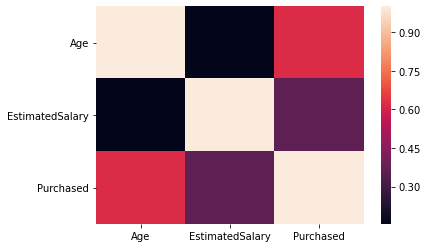

In [220]:
sns.heatmap(df.corr()) #corr() is used to find the pairwise correlation of all columns in the dataframe
#heat map gives you the intution about the correlation between the features

In [221]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [222]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [223]:
y=df["Purchased"]
X=df.drop("Purchased",axis=1) #dropping the purchased column

In [224]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler() #normalizing the data
X=scale.fit_transform(X)

In [225]:
#splliting the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [226]:
#calculating the accuracy
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8

In [227]:
#predecting the x_test data
y_pred=model.predict(X_test)

In [228]:
#confusion matrix is a table used to define the performance of a classification algorithm
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[55,  3],
       [17, 25]])

In [229]:
TN=matrix[0][0] #true negative
FP=matrix[0][1] #false positive
FN=matrix[1][0] #false negative
TP=matrix[1][1] #true positive
accuracy=(TP+TN)/(TP+FP+FN+TN)
error_rate=(FP+FN)/(TP+FP+FN+TN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)

In [230]:
print("Accuracy: ",accuracy)
print("Error_rate: ",error_rate)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.8
Error_rate:  0.2
Precision:  0.8928571428571429
Recall:  0.5952380952380952
